# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:** Thomas Heim

**Username:** thomheim

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html 
We do not entirely prohibit the use of generative language models ("smart assistants" like ChatGPT, Llama, Claude or Copilot), but you must clearly acknowledge this at all times, following the UiO guidelines: https://www.uio.no/english/studies/resources/ai_student.html
Note also that you must fully understand _all_ the parts of you submissions, even if you got some help from a generative model. This will be tested during your peer review sessions (https://www.uio.no/studier/emner/matnat/ifi/IN3050/v25/Peer%20review/).
By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Tuesday, April 22, 2025, 23:59 CEST

Your submission should be delivered in Devilry. You may make several submissions in Devilry before the deadline, but only the last delivery will be read, so make sure to include all files in the last delivery. It is recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

We recommend you to solve all exercises in this Jupyter notebook (alternative 1), but it is also possible to work with a regular Python script (alternative 2).

**Alternative 1:** If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you also have to submit a PDF of your solution which shows the results of the runs.

**Alternative 2:** If you prefer not to use notebooks, you should deliver the code as Python scripts together with your run results and a PDF report where you answer all the questions and explain your work.

Here is a list of *absolutely necessary* (but not sufficient) conditions to get the assignment marked as passed:

- You must deliver your code (Python script or Jupyter notebook) you used to solve the assignment.
- The code used for making the output and plots must be included in the assignment. 
- You must include example runs that clearly shows how to run all implemented functions and methods.
- All the code (in notebook cells or python main-blocks) must be runnable. If you have unfinished code that crashes, please comment it out and document what you think causes it to crash. 
- You must also deliver a PDF of the code, outputs, comments and plots as explained above.

Make sure to include your name and username in the submitted files. Deliver one single compressed folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the assignment
This assignment has two parts:
1. You will go through the basic theory of **Principal Component Analysis (PCA)** and implement PCA from scratch to compress and visualize data.
2. You will run **K-means clustering** using the `scikit-learn` toolkit and use PCA to visualize the results. You will also evaluate the output of K-means using a multi-class logistic regression classifier.

IN4050 students will have to do one extra part about tuning PCA to balance compression with information lost.

### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encourage the use of `scikit-learn` to iterate quickly on the problems.

We will use the *numpy* library for performing matrix computations and the *pyplot* library for plotting data, as well as *scikit-learn* for K-means clustering. This assignment also comes with a module called *data_assignment3* that you will use to import different (synthetic and real) datasets. Let's start by making sure that everything is installed.

In [39]:
%pip install numpy matplotlib scikit-learn

import data_assignment3

Note: you may need to restart the kernel to use updated packages.


# Part 1: Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

## Part 1.1: Implementation
Here we implement the basic steps of PCA and we assemble them. We will only need functions from *numpy* for this part.

In [40]:
import numpy as np

### Centering the Data
Implement a function with the following signature to center the data. Remember that every *feature* should be centered.

In [41]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)

    # Calcualte the mean of each feature (column)
    feature_means = np.mean(A, axis=0)
    # Subtract the mean from each feature to center the data around the origin
    X = A - feature_means
    return X

Test your function checking the following assertion on *testcase* (absence of output means that the assertion holds):

In [42]:
testcase = np.array([[3., 11., 4.3], [4., 5., 4.3], [5., 17., 4.5], [4, 13., 4.4]])
answer = np.array([[-1., -0.5, -0.075], [0., -6.5, -0.075], [1., 5.5, 0.125], [0., 1.5, 0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix

Implement a function with the following signature to compute the covariance matrix. In order to get this at the correct scale, divide by $N - 1$, not $N$.

**Note:** Numpy provides a function `np.cov()` that does exactly this, but in this exercise we ask you to implement the code from scratch without using this function.

In [43]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    
    # Get the number of samples
    N = A.shape[0]

    # Center the data by subtracting the mean of each feature
    A_centered = A - np.mean(A, axis=0)

    # Compute the covariance matrix using the formula:
    # C = (X^T * X) / (N-1)
    C = np.dot(A_centered.T, A_centered) / (N-1)
    

    return C

Test your function by comparing its output to the output of `np.cov()`:

In [44]:
test_array = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]])
answer = np.cov(np.transpose(test_array))
to_test = compute_covariance_matrix(test_array)
np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Note that we only take the real part of the eigenvectors and eigenvalues. The covariance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit length!

In [45]:
import numpy as np

def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors

    # Use numpy's linear algebra function to compute eigenvalues and eigenvectors
    # Eigenvalues tell us "how much variance" each eigenvector captures
    # Eigenvectors tell us the "direction" of that variance
    eigval, eigvec = np.linalg.eig(A)

    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    # Keep only the real part of the eigenvalues
    eigval = eigval.real
    # Keep only the real part of the eigenvectors
    eigvec = eigvec.real

    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [46]:
testcase = np.array([[2, 0, 0], [0, 5, 0], [0, 0, 4]])
answer_eigval = np.array([2., 5., 4.])
answer_eigvec = np.array([[1., 0., 0.], [0., 1., 0.], [0., 0., 1.]])
x, y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer_eigval)
np.testing.assert_array_almost_equal(y, answer_eigvec)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors in descending order.

Remember that eigenvalue `eigval[i]` corresponds to eigenvector `eigvec[:, i]`.

In [47]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    # Short eigenvalues in deceding order and reorder eigenvectors to match. 
    sorted_eigval, sorted_eigvec = np.sort(eigval)[::-1], eigvec[:, np.argsort(eigval)[::-1]]
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [48]:
testcase = np.array([[2, 0, 0], [0, 5, 0], [0, 0, 4]])
answer_eigval = np.array([5., 4., 2.])
answer_eigvec = np.array([[0., 0., 1.], [1., 0., 0.], [0., 1., 0.]])
x, y = compute_eigenvalue_eigenvectors(testcase)
x, y = sort_eigenvalue_eigenvectors(x, y)
np.testing.assert_array_almost_equal(x, answer_eigval)
np.testing.assert_array_almost_equal(y, answer_eigvec)

### PCA Algorithm
Implement a function with the following signature to compute PCA using the functions implemented above.

In [49]:
def pca(A, m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)

    # Center the data 
    X  = center_data(A)
    # Calculate covariance matrix
    C = compute_covariance_matrix(X)
    # Fin principal directions (eigenvectors) and their importance(eigenvalues)
    eigval, eigvec = compute_eigenvalue_eigenvectors(C)
    # Sort eigenvectors by importance(largest eigenvalues first)
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)

    # pca_eigcec: Keep the m most important patterns in our data_assignment3
    # P: Create compressed data by applying these patterns
    pca_eigvec, P = sorted_eigvec[:, :m], np.dot(X, sorted_eigvec[:, :m])
    return pca_eigvec, P

Test your function checking the following assertion on *testcase*:

In [50]:
import pickle
testcase = np.array([[22., 11., 5.5], [10., 5., 2.5], [34., 17., 8.5]])
x, y = pca(testcase, 2)

answer1 = pickle.load(open('PCAanswer1.pkl', 'rb'))
answer2 = pickle.load(open('PCAanswer2.pkl', 'rb'))

test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))

test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Part 1.2: Understanding - How does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *data_assignment3* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features):

In [51]:
import data_assignment3

X = data_assignment3.get_synthetic_data()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

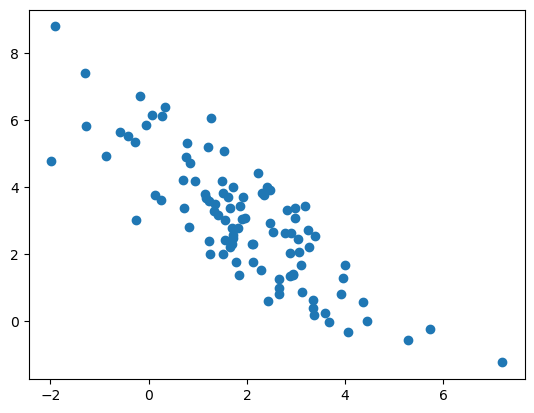

In [52]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

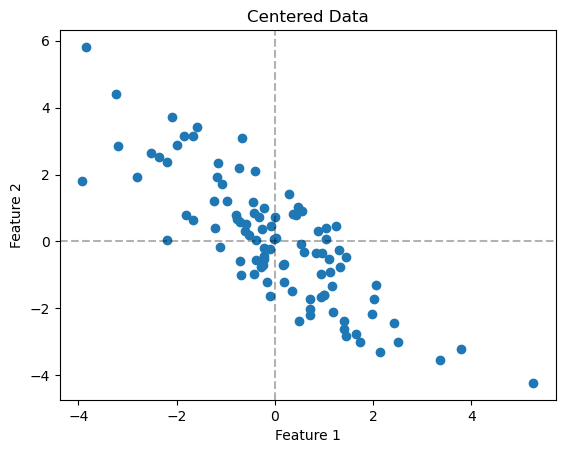

Original data means: [1.93305324 2.98072654]
Centered data means: [-1.06581410e-16 -2.44249065e-16]


In [53]:
## Your code here

# First center the data using our previously defined function
X_centered = center_data(X)

# Create scatter plot of centered data
plt.scatter(X_centered[:, 0], X_centered[:, 1])

# Add title and labels to make plot more informative
plt.title('Centered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a point at (0,0) to show the center
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.show()

# Check means of original data
print("Original data means:", np.mean(X, axis=0))
# Check means of centered data
print("Centered data means:", np.mean(X_centered, axis=0))



**Comment on the result**:

The original data was a little bit off from zero( means of 1.93 and 2.98), but after centering we see that the means are effectively zero (10^-16), proving that the centering operation worked as we wanted. 

End of solution. 

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

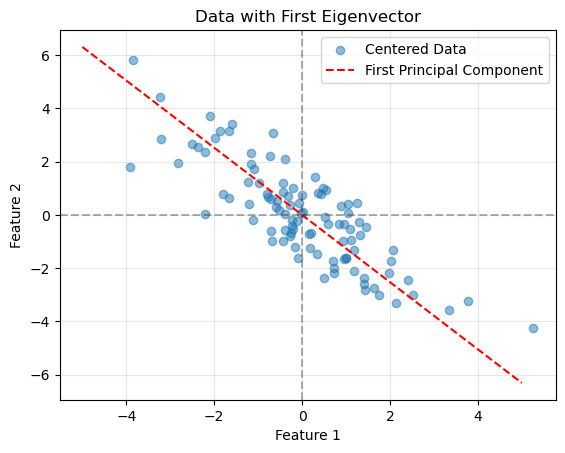

In [54]:
pca_eigvec,P = pca (X, m= 2) # Get both eigenvectors
first_eigvec = pca_eigvec[:, 0] # Get just the first eigenvector

# Plot centered data 
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label='Centered Data')

# Create  line for eigenvector
x = np.linspace(-5, 5, 1000)
# Draw a line thorugh the strongest pattern in our data. 
y = first_eigvec[1]/first_eigvec[0] * x 

# Plot eigenvector line
plt.plot(x, y, 'r--', label='First Principal Component')

# Make plot prettier
plt.title('Data with First Eigenvector')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

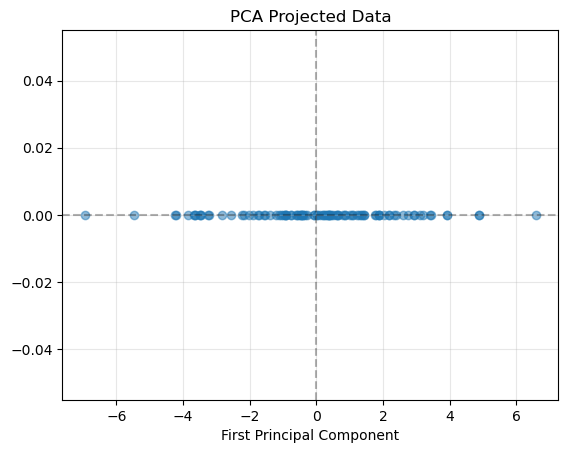

In [55]:
## Your code here

# Project data onto 1 miension using PCA 
pca_eigvec, P = pca(X,m= 1)

# Visualize the projected data
plt.scatter(P, np.zeros_like(P), alpha=0.5)
plt.title('PCA Projected Data')
plt.xlabel('First Principal Component')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

## Part 1.3: Evaluation - When are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_labeled_data_1()* from the module *data_assignment3* provides a first labeled dataset.

In [56]:
X, y = data_assignment3.get_synthetic_labeled_data_1()

### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

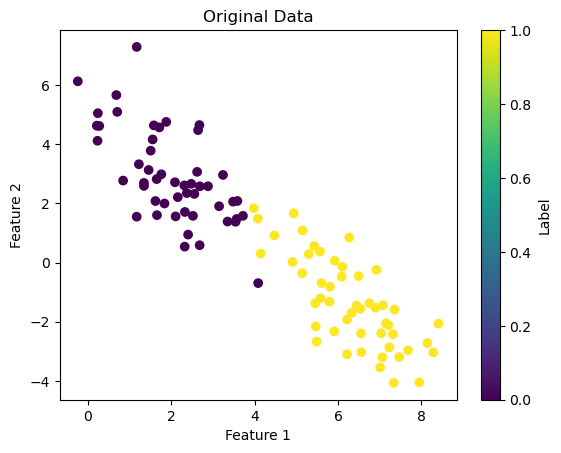

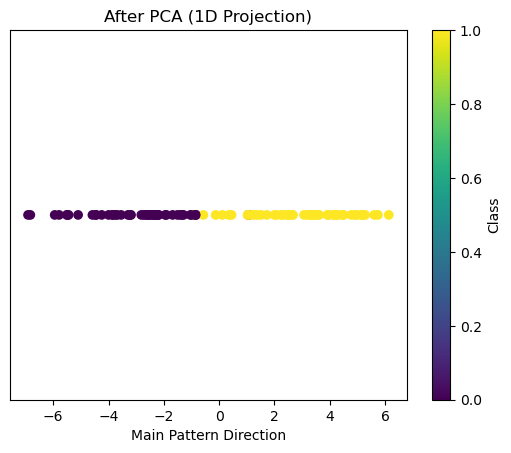

In [57]:
# before PCA
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Label")

# after PCA
plt.figure()
pca_eigvec, P = pca(X, m=1) # Project data to 1 dimension
plt.scatter(P, np.zeros_like(P), c=y[:, 0])
plt.title("After PCA (1D Projection)")
plt.xlabel("Main Pattern Direction")
plt.yticks([]) # Remove y-axis labels since we're in 1D
plt.colorbar(label="Class")
plt.show()
# ...

**Comment:** We can see above in the output that PCA has maintained the class separtion after reducing from 2D to 1D. In the original data we have two seperate classes (purple and yellow). After projection into the main pattern direction, these calsses still are separated with purple points on the left side and yellow point on the right. This seperation might indicate the the pattern of maximum variance aligns well with the direction that best seperate the classes. PCA in the example above have found a optimal 1 representation that preserves the most importan structure of the data. 

End of solution. 

### Loading the second set of labels
The function *get_synthetic_labeled_data_2()* from the module *data_assignment3* provides a second labeled dataset.

In [58]:
X, y = data_assignment3.get_synthetic_labeled_data_2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

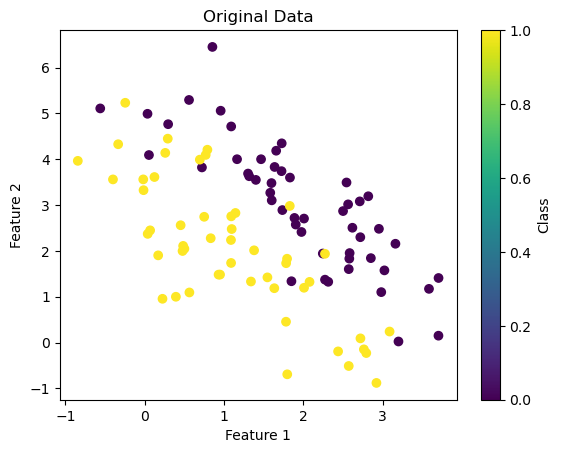

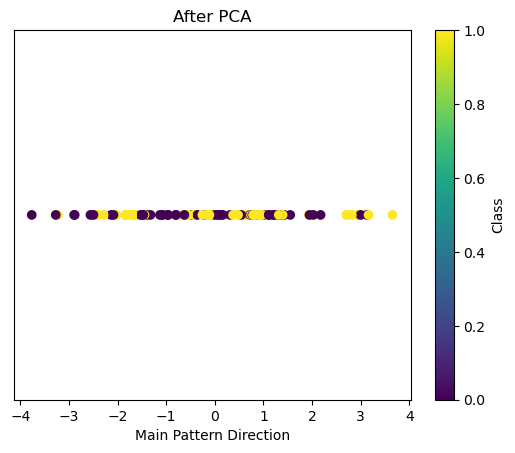

In [59]:
# Your code here

#Before PCA 
plt.scatter(X[:,0],X[:,1], c=y[:,0])
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")

# Run PCA and project to ID
plt.figure()
pca_eigvec,P = pca(X,m=1)

#After PCA 
plt.scatter(P, np.zeros_like(P), c=y[:,0])
plt.title("After PCA")
plt.xlabel("Main Pattern Direction")
plt.yticks([]) # Hide y-axis labels
plt.colorbar(label="Class")
plt.show()


**Comment:** We can see that the original 2D data show that the labels are not clearly sperated. After projection to 1D, this mixing becomes even more clear, with pruple and yellow points overlapping along the main pattern direction. We can see that PCA has a limitation here since it finds direction of maximum variance without considering class labels. In the plot above we see that the direction with the most variation dosent correspond to the direction that would best separate the classes. 

End of solution. 

How would the result change if you were to consider only the second eigenvector?
What about if you were to consider both eigenvectors?

**Answer**: If we only used the second eigenvector, we might see a different pattern in the data separation since it covers the second most important direction of variation. This might give us better seperation. However if we use both both eigenvectors I think we would maintain all the original information and class separtion patterns we see in the original plot, since we are not reduing the dimension, so we would see that the classes are mixed. 

End of solution. 

## Part 1.4: Case study 1 - PCA for visualization

The [*iris* flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) is one of the oldest and best known data collections used for machine learning. It consists of 50 samples from each of three species of iris flowers (*Iris setosa, Iris virginica and Iris versicolor*). Four features were measured from each sample: sepal length, sepal width, petal length and petal width, all in centimeters.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *data_assignment3* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [60]:
X, y = data_assignment3.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

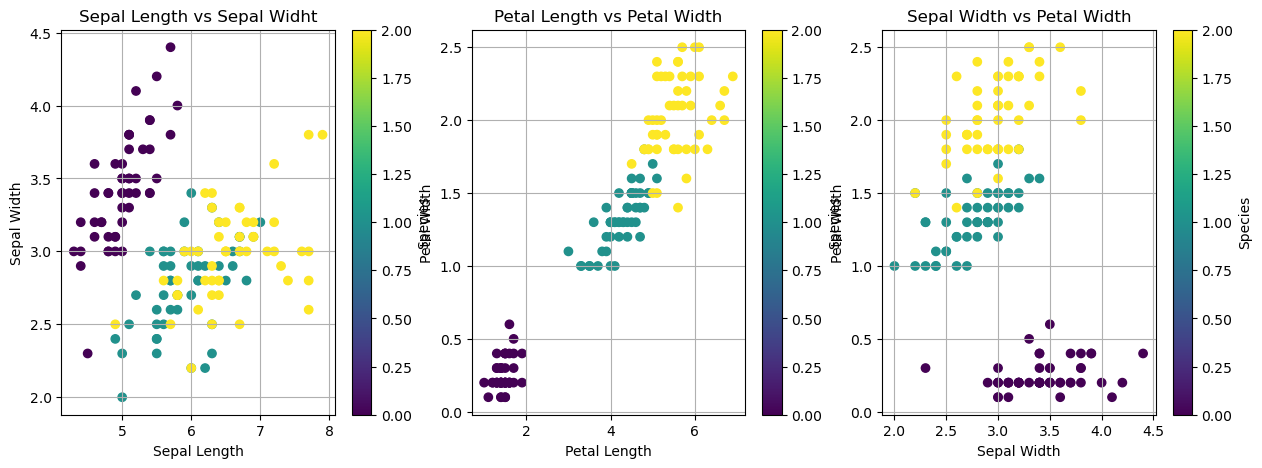

In [61]:
# Your code here

# Create a figure with multiple subplots for different feature pairs
plt.figure(figsize=(15,5))

# Plot first pair: features 0 and 1 (sepal length vs sepal width)
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Sepal Length vs Sepal Widht")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.colorbar(label="Species")
plt.grid()

# Plot second pair: features 2 and 3 (petal length vs petal width)
plt.subplot(1,3,2)
plt.scatter(X[:,2],X[:,3], c=y)
plt.title("Petal Length vs Petal Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.colorbar(label="Species")
plt.grid()

# Plot third pair: features 1 and 3 (sepal widht vs petal width)
plt.subplot(1,3,3)
plt.scatter(X[:,1],X[:,3], c=y)
plt.title("Sepal Width vs Petal Width")
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.colorbar(label='Species')
plt.grid()

plt.tight_layout
plt.show()



### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

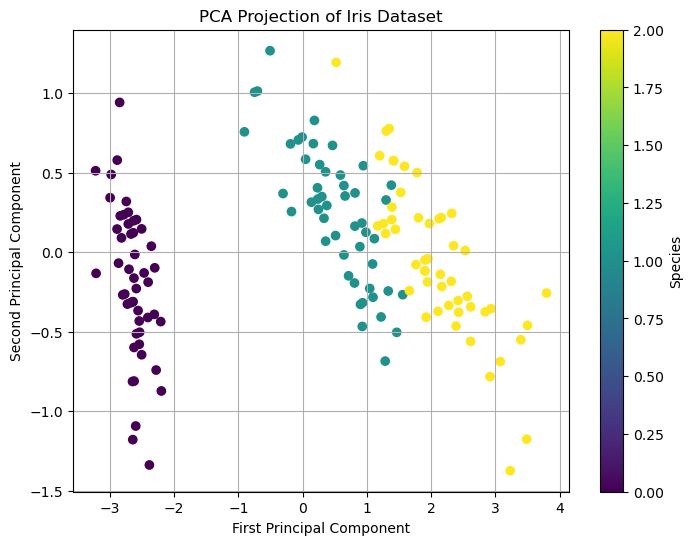

In [62]:
# Your code here

# Process the data using PCA and reduce to 2 dimensions
pca_eigvec, P = pca(X, m=2)

# Visualize the PCA projection with labels
plt.figure(figsize=(8, 6))
plt.scatter(P[:, 0], P[:, 1], c=y)
plt.title('PCA Projection of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Species')
plt.grid()
plt.show()


**Comment:** The PCA projection gives a better seperation of the tree iris species compared to any single pair of original features. Looking at the original pairs:
- Sepal Length vs Sepal Width shows significant overlap between species.
- Petal Length vs Petal Width shows good seperation, especially for the purple label. 
- Sepal Width vs Petal Width shows seperation but still some overlap for green and yellow labels.

The PCA combines infromation form all four features to create an optimal 2D view where:
- Purple label is completely seperated form the others.
- The two other labels (yellow and green) show better separation than in any single feature pair, but there is still a little bit of overlap. 

This shows that PCA is good to use to find the most informative directions in the data by combining mulitple features, creating better class separation than looking at any two original features alone. 

End of solution. 

## Part 1.5: Case study 2 - PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *data_assignment3* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [63]:
X, y, h, w = data_assignment3.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that the first argument of *imshow* is the image to be plotted; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

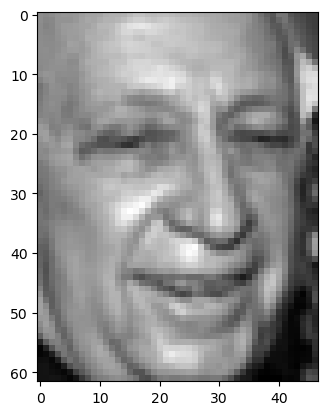

In [64]:
image_number = 4    # display the 4th image of the collection
plt.imshow(X[image_number, :].reshape((h, w)), cmap=plt.cm.gray)

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and then reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented.

In [65]:
def encode_decode_pca(A, m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)

    # Center the data
    X = center_data(A)
    mean = np.mean(A, axis=0) # Store the mean fro reconstruction

    # Get PCA projection (encode/compress)
    pca_eigvec, P = pca(A,m)

    # Reconstruct the data (decode/decompress)
    Ahat = np.dot(P, pca_eigvec.T)
    
    # Add back the mean to get original scale 
    Ahat = Ahat + mean
    return Ahat

### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [66]:
Xhat = encode_decode_pca(X, m=200)

### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

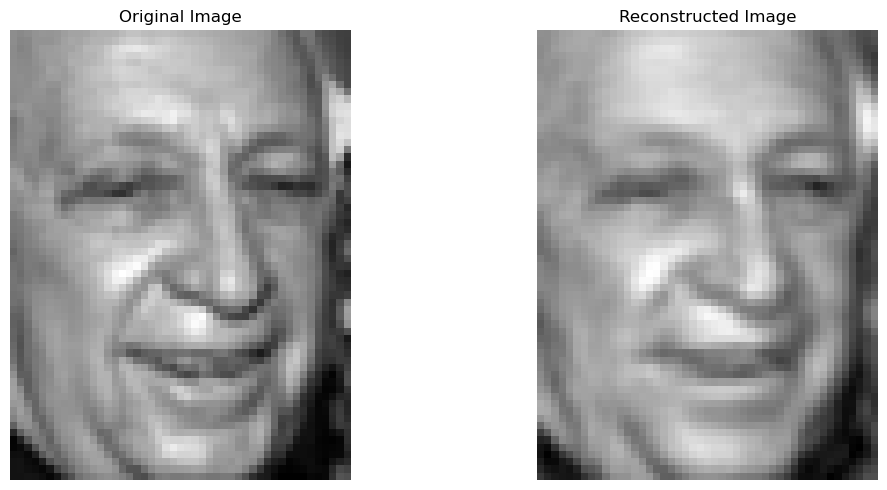

Mean squared error: 0.001166


In [67]:
# Your code here

# Choose an image number to display 
image_number = 4

# Crate a digure with two subplots side by side 
plt.figure(figsize=(12,5))

# Plot orginal image 
plt.subplot(1,2,1)
plt.imshow(X[image_number, :].reshape((h, w)), cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off') # Hide axed for better visualization

# Plot reconstructed image 
plt.subplot(1,2,2)
plt.imshow(Xhat[image_number,:].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Reconstructed Image")
plt.axis("off") # Hide axed for better visualization

plt.tight_layout()
plt.show()

# Print mean squared error to better show the difference
mse = np.mean((X[image_number]- Xhat[image_number])**2)
print(f"Mean squared error: {mse:.6f}")

**Comment:** The reconstructed image using 200 dimentions show okey quality compared to the original. Key facial features like eyes, nose, smile and overall facial structure are well preserved. The low mean squared error (0.001166) confirms what we are seen visually, that there is minimal difference between the original and reconstructed images. We can see that the reconstructed image is just slightly more blury than the original one, indicating that we have found a good balance between compression and quality. 

End of solution. 

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 20, 100, 200, 500, 1000). Plot and comment on the results. You can use `plt.subplot(n_rows, n_cols, position)` and `plt.title(titlestring)` to get a nice plot.

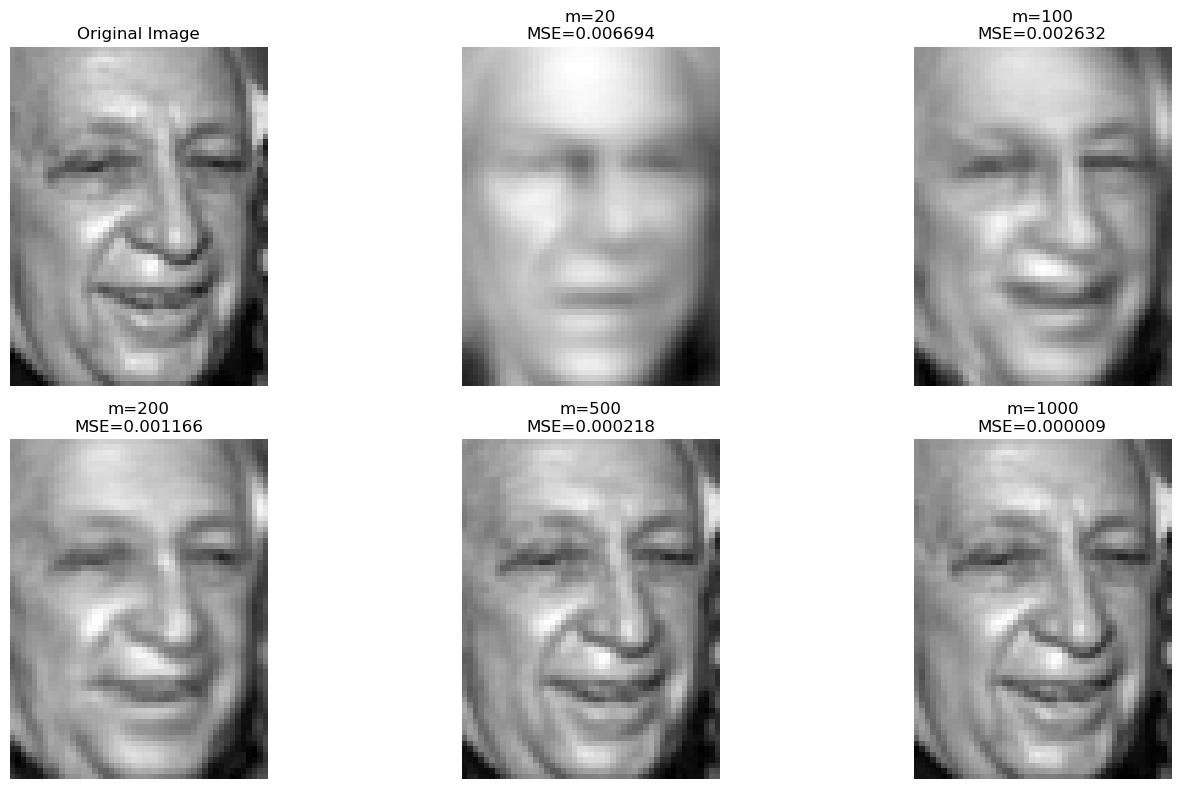

In [68]:
# Your code here

# Define different compression levels to test 
dimensions = [20,100,200,500,1000]

# Create a figure with subplots for each compression level plus original
plt.figure(figsize=(15,8))

# Plot original image 
plt.subplot(2,3,1)
plt.imshow(X[image_number,:].reshape((h,w)), cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis('off')

# Plot reconsturcted images for differen dimensions
position = 2
for m in dimensions: 
    # Compress and reconstruct
    Xhat = encode_decode_pca(X,m=m)
    # Calcualte MSE
    mse = np.mean((X[image_number]- Xhat[image_number])**2)

    # Plot
    plt.subplot(2,3,position)
    plt.imshow(Xhat[image_number,:].reshape((h,w)), cmap=plt.cm.gray)
    plt.title(f'm={m}\nMSE={mse:.6f}')
    plt.axis('off')

    position += 1

plt.tight_layout()
plt.show()


**Comment:** The results show how image quality improves as we increase the number of dimensions in PCA compression:
- m=20 (MSE=0.006694): Is verry blurry with only basic facial structures. Major details are lost.
- m=100 (MSE=0.002632): Better quality than m=20. Main facial features we now can see better, but still blurry. 
- m=200 (MSE=0.001166): We have looked at this before. We see that its a good balance between compression and quality. 
- m=500 (MSE=0.000218): Closer to the original image quality. 
- m=1000 (MSE=0.000009): Nearly the quality as the original. 

The mean squared error decreases consistenly as dimentions increase, comfirming the visual improvement we observe. This shows that when we are using PCA we can compress images by keeping the most important patter, with a tradoff between compression and quality. 

End of solution. 


## Part 1.6: PCA tuning (compulsory for Master students only)
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $m$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

In [69]:
def encode_decode_pca_with_pov(A, p):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # p    float number between 0 and 1 denoting the POV to be preserved
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    # m    integer reporting the number of dimensions selected

    Ahat = None
    m = None
    return Ahat, m

Import the `lfw` dataset again. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that `POV=0.95`. Use the function `imshow` to plot and compare original and reconstructed pictures. Comment on the results.

In [70]:
X, y, h, w = data_assignment3.get_lfw_data()

Xhat, m = None, None
print("Selected dimensions:", m)

# Plot the images here

Selected dimensions: None


**Comment:** Enter your comment here.

# Part 2: K-Means Clustering
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assessment of the results.

## Part 2.1: Applying K-Means and Qualitative Assessment

### Importing scikit-learn library
We start importing the module `sklearn.cluster.KMeans` from the standard machine learning library `scikit-learn`.

In [71]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. Start by loading the dataset again.

In [72]:
X, y = data_assignment3.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. But to start, we use PCA, as this will allow for an easy visualization.

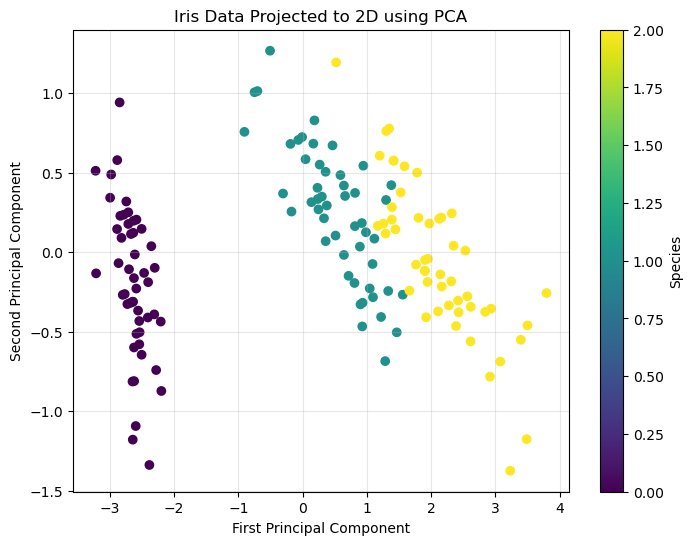

In [73]:
# Your code here

# Project the iris data into 2 dimensions using PCA
pca_eigcec, P = pca(X,m=2)

# Visualize the projected data
plt.figure(figsize=(8,6))
plt.scatter(P[:,0], P[:,1], c=y)
plt.title('Iris Data Projected to 2D using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Species')
plt.grid(True, alpha=0.3)
plt.show()

### Running k-means
Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data (note that we don't use the true labels `y` here). Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [74]:
k_values = [2, 3, 4, 5]
y_hats = []

for i in range(len(k_values)):
    # Initialize KMeans object with correct value for k
    # Fit the algorithm to the training data and store the predictions in y_hats

    #Initialize KMeans 
    kmeans = KMeans(n_clusters=k_values[i], random_state=42)

    # Fit the algorithm to the data and get predictions
    y_hat = kmeans.fit_predict(P)

    # Store the predictions
    y_hats.append(y_hat)

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

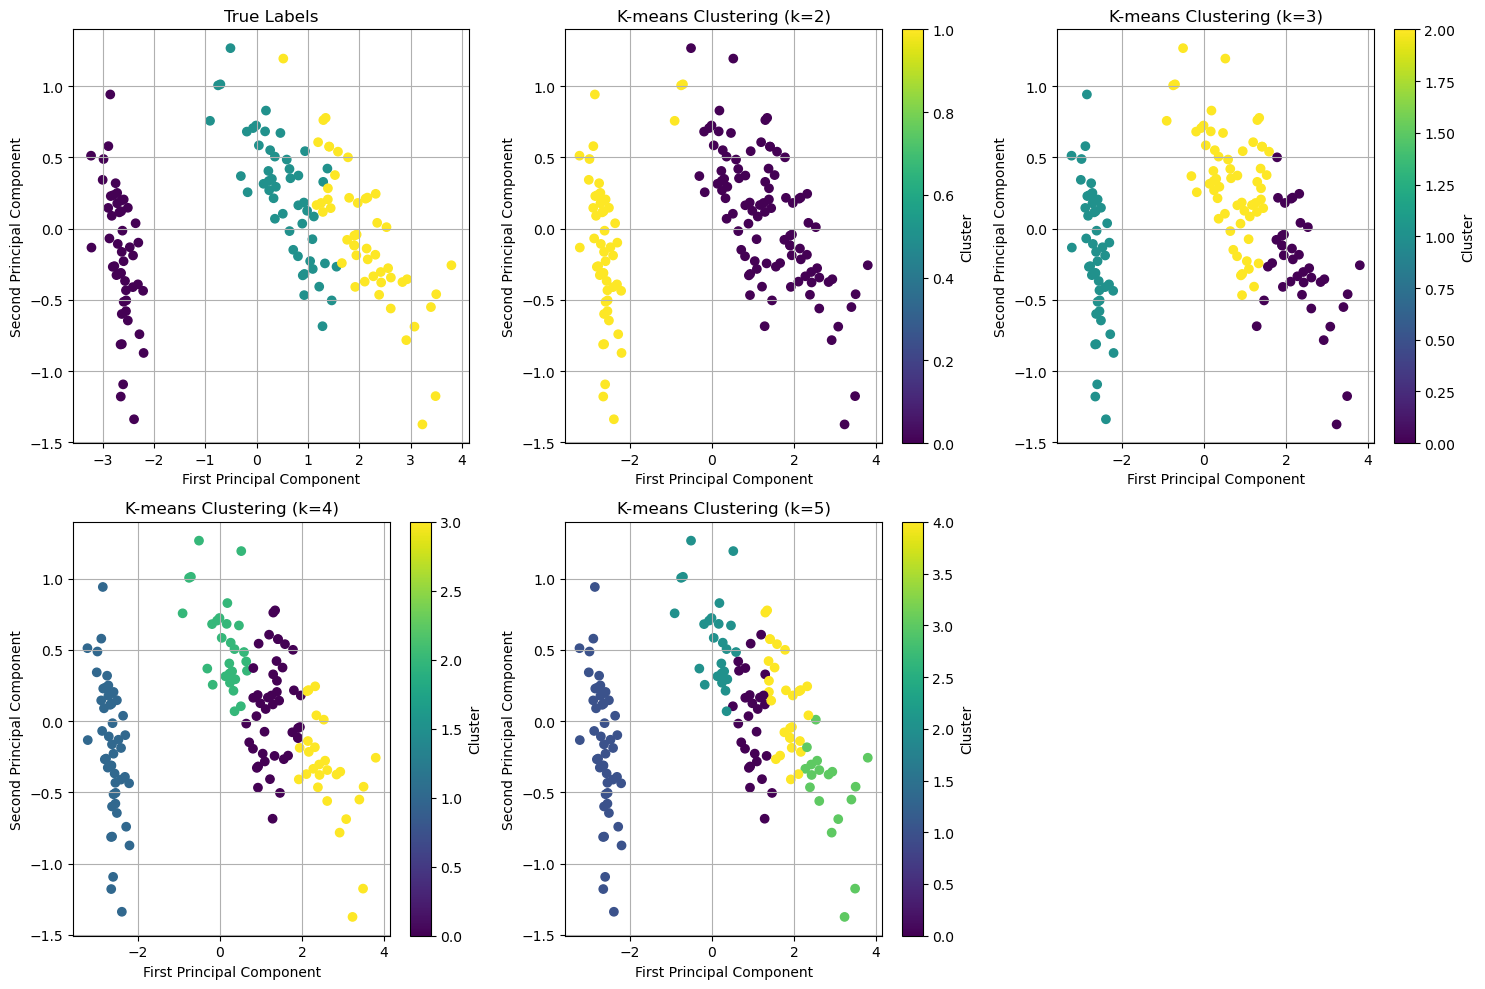

In [75]:
# Your code here

# Create subplots to compare true labels with k-means results for all k values
plt.figure(figsize=(15, 10))

# Plot true labels
plt.subplot(2, 3, 1)
plt.scatter(P[:, 0], P[:, 1], c=y)
plt.title('True Labels')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)

# Plot k-means results for each k value
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i+2)
    plt.scatter(P[:, 0], P[:, 1], c=y_hats[i])
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(label='Cluster')
    plt.grid(True)

plt.tight_layout()
plt.show()
  

**Comment:** Comparing the k-means clustering results with different k values to the true labels:

- K=2: The algorithm identifies the most distinct group(left cluster), but combines the other two species into one cluster. This might indicate a natural separation between one species and the others. 
- K=3: This provides the best match for true labels. The leftmost group is again separated, while there is some mixing between the other two cluster at their boundry. 
- K=4 and K=5: Introduces over-segmentation where they artificially subdevides the other groups.This demonstrates that incrasing k beyond the natural number of classes doesn`t improve classification but instad fragments natural clusters.  They are still segmenting the leftmost cluster. 

This comparison suggest that k=3 is the most appropriate choice based on what we see in the output above. 

End of solution. 

## Part 2.2: Quantitative Assessment of K-Means

Above, we used k-means for clustering and assessed the results qualitatively by visualizing them. However, we often want to measure in a quantitative way how good a clustering is. To do this, we will use a classification task to **evaluate numerically how good the learned clusters are for all the different values of k you used above (2 to 5)**.

Informally, our evaluation will work as follows: For each of our clusterings ($k=2$ to $k=5$), we will try to learn a mapping from the identified clusters to the correct labels of our datapoints. The reason this can be a sensible evaluation, is that to learn a good mapping, we have to have identified clusters that correspond to the actual classes in our data. We will in other words train 4 different classification models (one for each $k$ value), where the input to our classifier is the cluster each datapoint belongs to, and the target is the correct class for this datapoint. In other words, **we aim to learn to classify datapoints as well as possible with the only information available to the classifier being the cluster that datapoint belongs to**. For some values of k, we will get poorly performing classifiers, indicating that this clustering has not revealed the correct class division in our data.

In practice, you will do the following: Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhats[2],...,yhats[5]`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the `sklearn.metrics` module. Plot a graph showing how the accuracy score varies when changing the value of $k$. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes outputed by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

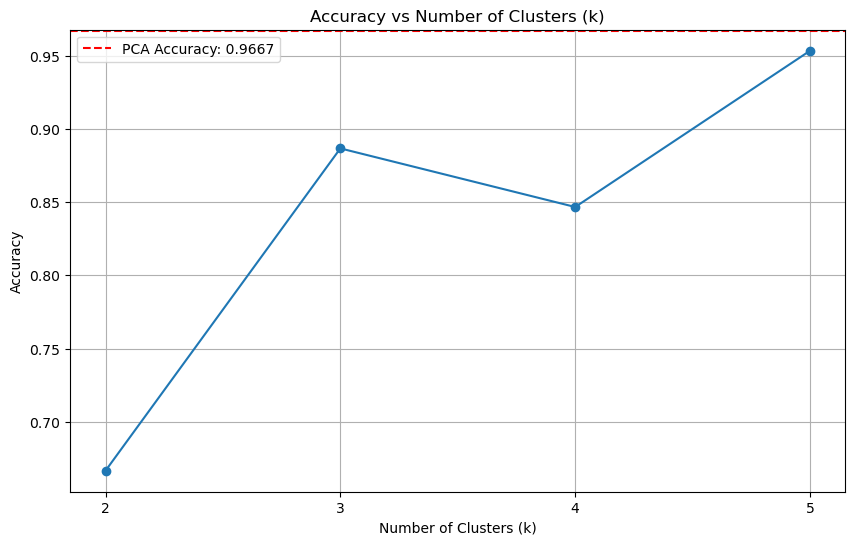

Accuracy for different k values:
------------------------------
PCA Baseline: 0.9667
------------------------------
k = 2: 0.6667
k = 3: 0.8867
k = 4: 0.8467
k = 5: 0.9533


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Your code here

# Train logistic regression on PCA data 
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(P, y) # Train model on PCA data and true labels
pca_accuracy = metrics.accuracy_score(y,model_pca.predict(P)) # Get accuracy of model on PCA data

accuracies = []

# Loop over each k value tested in k-means
for i in range(len(k_values)):
    # Convert cluster assigments to one-hot encoded format
    k = k_values[i] # Get current k value
    y_hat_onehot = np.zeros((len(y_hats[i]),k)) # Initialize empty matrix
    for j in range(len(y_hats[i])): # Fill matrix wiht one-hot encoded values. 
        y_hat_onehot[j,y_hats[i][j]] = 1
    
    # Train logisitc regression
    model = LogisticRegression(max_iter=1000)
    model.fit(y_hat_onehot,y) # Train using one-hot encoded clusters

    # Calculate accuracy
    predictions = model.predict(y_hat_onehot) # Get predictions
    accuracy = metrics.accuracy_score(y,predictions) #Calcualte accuracy
    accuracies.append(accuracy) # Store accuracy for this k

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.axhline(y=pca_accuracy, color='r', linestyle='--', 
           label=f'PCA Accuracy: {pca_accuracy:.4f}')
plt.title('Accuracy vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

# Print accuracy values
print("Accuracy for different k values:")
print("-" * 30)
print(f"PCA Baseline: {pca_accuracy:.4f}")
print("-" * 30)
for i in range(len(k_values)):
    print(f"k = {k_values[i]}: {accuracies[i]:.4f}")


**Comment:** 
- **K=2**: Performs the worst(0.6667), confirming our visual assesment that two clusters are not enough to capture the groupings in the data
- **K=3**: Show improvment(0.8867), that alignes with my earlier observation that three clusters correspons well with the structure of the data.
- **K=4 and K=5**: Intrestinlgy we see that k=4 shows slightly lower accuracy than k=3, k=5 have the higest score(0.9533), close to the PCA basline. This can indicate that while three clusters visually match the data, additional cluster can help the classifier better handle boundry region where classes overlapp. 

None of the k-means values had the same accuracy as using PCA directly, indicating some information loss during clustering, but we came quit close when we set k=5.

End of solution. 

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then ran the algorithm on synthetic data in order to see its working and evaluated when it makes sense to use it and when it doesn't. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dataset. We also looked at an additional question that arises when using PCA: the problem of **selection of hyper-parameters**, that is, how to select the optimal hyper-parameter of our algorithm for a particular task.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and applied it to another prototypical unsupervised learning problem: **clustering**. We processed the *iris* dataset with *k-means* and evaluated the results visually. We also considered the problem of **quantitative evaluation** of the results, that is, how to measure the performance or usefulness of k-means clustering on a downstream task (classifying the *iris* samples into their species).